In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
file_path = '../data_raw/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head() 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


In [3]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e...",los andenes son para los peatones reclama enfá...
2,A las 7 de la noche me había quedado de encont...,a las de la noche me había quedado de encontr...
3,Atravesados. Eso es lo que se les pasa por la ...,atravesados eso es lo que se les pasa por la c...
4,“Estamos proponiendo la figura de un contrato ...,“estamos proponiendo la figura de un contrato ...


Dimensiones de los datos: (13738, 7)


In [4]:
# Tokenización
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc..."
1,los andenes son para los peatones reclama enfá...,"[los, andenes, son, para, los, peatones, recla..."
2,a las de la noche me había quedado de encontr...,"[a, las, de, la, noche, me, había, quedado, de..."
3,atravesados eso es lo que se les pasa por la c...,"[atravesados, eso, es, lo, que, se, les, pasa,..."
4,“estamos proponiendo la figura de un contrato ...,"[“, estamos, proponiendo, la, figura, de, un, ..."


In [5]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

In [6]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
1,"[los, andenes, son, para, los, peatones, recla...","[andenes, peatones, reclama, enfática, carmenz..."
2,"[a, las, de, la, noche, me, había, quedado, de...","[noche, quedado, encontrar, boris, siempre, si..."
3,"[atravesados, eso, es, lo, que, se, les, pasa,...","[atravesados, pasa, cabeza, residentes, transe..."
4,"[“, estamos, proponiendo, la, figura, de, un, ...","[“, proponiendo, figura, contrato, civil, unió..."


In [7]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

,aa,aaa,aaacpt,aaah,aaas,aac,aacsb,aacta,aademás,aage,...,𝑓𝑖𝑗𝑜𝑠,𝑙𝑎,𝑚𝑎𝑟𝑐𝑜,𝑚𝑖𝑒𝑚𝑏𝑟𝑜𝑠,𝑚𝑢𝑒𝑠𝑡𝑟𝑎,𝑝𝑐𝑒𝑙𝑢𝑙𝑎𝑟,𝑝𝑒𝑟𝑠𝑜𝑛𝑎,𝑝𝑒𝑟𝑠𝑜𝑛𝑎𝑠,𝑝𝑓𝑖𝑗𝑜,𝑝𝑖
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Información adicional
lista_contenido= data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string

contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector numérico que puede ser
utilizado en algoritmos de aprendizaje automático. Ese vector representa la importancia 
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificación para predecir la categoría de un documento.
- Recuperación de información para encontrar documentos similares.

"""

print(text_info)

En este ejemplo particular tomamos el contenido:

las autoridades están buscando al conductor de una moto que le lanzó el casco a
carlos alberto carmona operador de grúa de la empresa segrup quien perdió por una hora
el conocimiento tras la agresión en un video quedó registrado el momento en el que
tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la
avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con
los objetos que tienen en sus manos entonces el conductor de la moto arroja su
casco contra el operador el hombre recibe el impacto en su cara por lo que
s e desgonza y en la caída se golpea la cabeza con la grúa que
conduce el agredido perdió el conocimiento por cerca de una hora en ese instante el
agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde
está el operador en el suelo luego su compañero agarra la moto y huye del
lugar y a pocos metros recoge al agresor

In [9]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

In [10]:
# Obtener los embeddings de una palabra ejemplo
word_example = 'cama'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

Embedding de la palabra "cama":
[-0.04360591  0.09880888 -0.01653446 -0.12090811  0.24935728 -0.47670358
  0.40241104  1.0562931  -0.4744878  -0.4483927   0.66824025  0.15767379
  0.42881733  0.6113759  -0.27389488 -0.18167609  0.3707839   0.07002597
  0.4744105  -0.8113912  -0.24747933  0.07858425 -0.47074497  0.08561084
  0.07974668  0.33581468  0.3263835   0.22009653 -0.35367465  0.47018152
  0.00598559  0.01029263  0.22416605 -0.07017822  0.14720786  0.16611364
  0.10797258 -0.5803401   0.4342144  -0.7655105   0.1837001  -0.5675637
  0.43364957  0.68852013  1.0571884   0.88484913 -0.43698362  0.32319352
  0.6278182   0.20352167  0.24136554  0.44533962  0.00366868  0.0514069
 -0.14078678 -0.12574969  0.14100261  0.16470589 -0.8433736   0.12088003
  0.32914492  0.427758   -0.16358124  0.00145375 -0.02009231  0.46979135
  0.20948793  0.4396503  -0.3592627   0.05314536 -0.4600556  -0.1071309
  0.29732788  0.6664287   0.30317077  0.3729828   0.18838945  0.32598752
  0.03654966 -1.183043

In [11]:
# Guardar el modelo Word2Vec
# word2vec_model.save("../../Datos/Embeddings/word2vec.model")

In [12]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


def plot_embeddings_advanced(model, words, figsize=(15, 10)):
    # Preparar datos
    vectors = []
    words_to_plot = []
    
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
            words_to_plot.append(word)
    
    if not vectors:
        print("No se encontraron palabras en el modelo")
        return
        
    vectors = np.array(vectors)
    
    # Calcular perplexidad apropiada
    n_samples = len(vectors)
    perplexity = min(n_samples - 1, 30)  # Asegurarse que perplexity < n_samples
    
    # TSNE con perplexidad ajustada
    tsne = TSNE(
        n_components=2,
        random_state=42,
        perplexity=perplexity if n_samples > 5 else 2,  # Ajuste adicional para muestras muy pequeñas
        n_iter=300,
        learning_rate='auto'  # Ajuste automático del learning rate
    )
    
    try:
        vectors_2d = tsne.fit_transform(vectors)
        
        # Crear plot con mejor estilo
        plt.figure(figsize=figsize)
        sns.set_style("whitegrid")
        
        # Crear scatter plot
        scatter = plt.scatter(
            vectors_2d[:, 0],
            vectors_2d[:, 1],
            c=range(len(vectors_2d)),
            cmap='viridis',
            alpha=0.6
        )
        
        # Añadir labels con mejor formato
        for i, word in enumerate(words_to_plot):
            plt.annotate(
                word,
                (vectors_2d[i, 0], vectors_2d[i, 1]),
                xytext=(5, 5),
                textcoords='offset points',
                bbox=dict(
                    boxstyle='round,pad=0.5',
                    fc='yellow',
                    alpha=0.1
                ),
                fontsize=10
            )
        
        plt.title(f"Visualización de Word Embeddings\n{len(words_to_plot)} palabras, perplexity={perplexity}", 
                 fontsize=14, 
                 pad=20)
        plt.xlabel("Primera Dimensión")
        plt.ylabel("Segunda Dimensión")
        
        # Añadir colorbar
        plt.colorbar(scatter)
        
        plt.tight_layout()
        plt.show()

        # # Mostrar matriz de similitud
        # print("\nMatriz de Similitud:")
        # similarity_matrix = np.zeros((len(words_to_plot), len(words_to_plot)))
        # for i, word1 in enumerate(words_to_plot):
        #     for j, word2 in enumerate(words_to_plot):
        #         similarity_matrix[i,j] = model.wv.similarity(word1, word2)
        
        # # Visualizar matriz de similitud
        # plt.figure(figsize=(10, 8))
        # sns.heatmap(
        #     similarity_matrix,
        #     xticklabels=words_to_plot,
        #     yticklabels=words_to_plot,
        #     annot=True,
        #     fmt='.2f',
        #     cmap='YlOrRd'
        # )
        # plt.title("Matriz de Similitud entre Palabras")
        # plt.xticks(rotation=45)
        # plt.yticks(rotation=0)
        # plt.tight_layout()
        # plt.show()
        
    except Exception as e:
        print(f"Error en la visualización: {e}")
        print(f"Número de muestras: {n_samples}")
        print(f"Perplexity utilizada: {perplexity}")

# # Mostrar palabras más similares para algunas palabras clave
# palabras_clave = ["gato", "perro", "mascota"]
# for palabra in palabras_clave:
#     if palabra in model.wv:
#         print(f"\nPalabras más similares a '{palabra}':")
#         similares = model.wv.most_similar(palabra)
#         for word, score in similares[:5]:  # Mostrar top 5
#             print(f"{word}: {score:.4f}")

c:\Users\ingen\Documents\estudio\especializacion_ml\ml\nlp\nlp_env\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


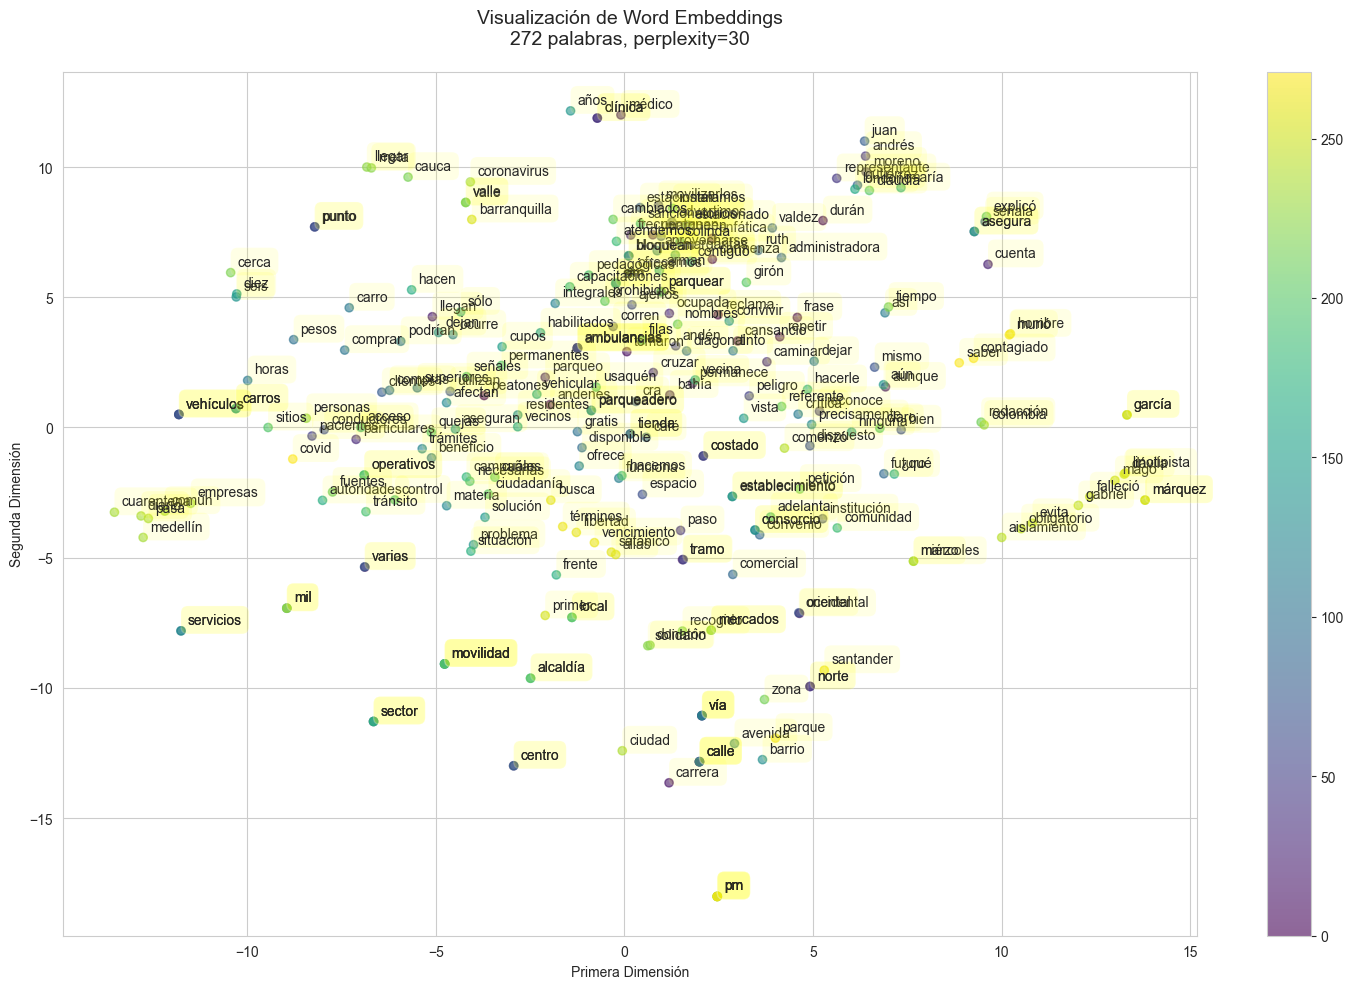

In [13]:
plot_embeddings_advanced(word2vec_model, data['tokens_sin_stopwords'][1])

In [14]:
# # Unir los tokens en una sola cadena de texto para cada documento
# data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer2 = TfidfVectorizer(
                                    max_features=1000,  # Limitar el número de features
                                    min_df=0.1,
                                    max_df=0.9,
                                    ngram_range=(1, 2)  # Incluir bigramas
)
tfidf_matrix2 = tfidf_vectorizer2.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df2 = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf_vectorizer2.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df2.head()

,acceder,acceder medicamen,acuerdo,además,ahora,aislamiento,aislamiento obligatorio,alias,alias satánico,aranzazu,...,ver,vergara,vergara ángel,vez,vida,vida par,zona,ángel,ángel garcía,últimos
0,0.0,0.0,0.0,0.000000,0.000000,0.115917,0.120534,0.093132,0.095970,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.114947,0.119525,0.092353,0.095166,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.119577,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.076589,0.093654,0.097385,0.075246,0.077538,0.0,...,0.091724,0.0,0.0,0.0,0.041428,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.116177,0.120804,0.093341,0.096185,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.120856,0.0,0.0,0.0
4,0.0,0.0,0.0,0.047014,0.000000,0.064696,0.067273,0.051980,0.053563,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


### Modelo simple de PCA y Clustering

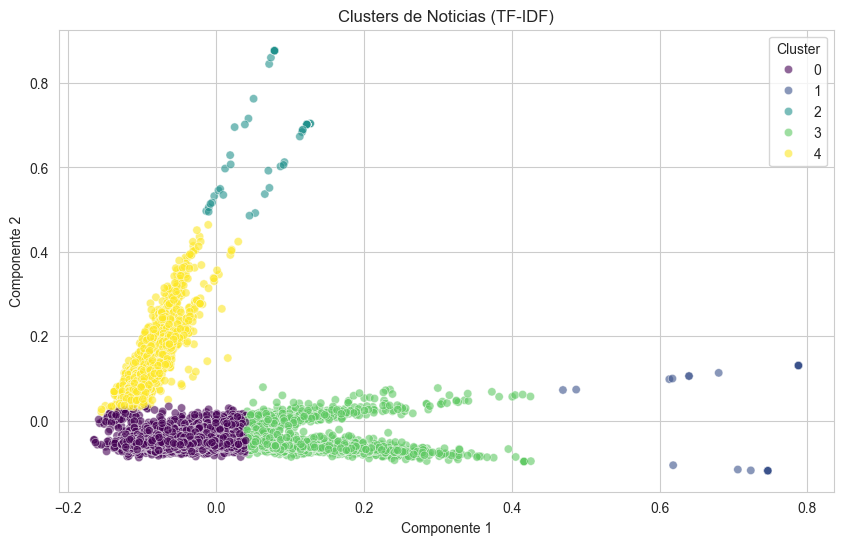

In [15]:
# modelo 1 para unigramas con tf-idf

# PCA para reducir la dimensionalidad

from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

# Crear un DataFrame con los resultados de PCA
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=['Componente 1', 'Componente 2'])

# ajustar modelo kmeans con 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_pca_df)

# Añadir las etiquetas de los clusters al DataFrame
tfidf_pca_df['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tfidf_pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters de Noticias (TF-IDF)')
plt.show()

In [16]:
# visualizar las palabras por cluster

# Obtener los centroides de los clusters
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=tfidf_df.columns)

# Mostrar las palabras más importantes de cada cluster
n_palabras = 10
for i, row in cluster_centers_df.iterrows():
    print(f"\nCluster {i}:")
    print(row.nlargest(n_palabras), "\n")



Cluster 0:
pm           0.053173
colombia     0.028384
manizales    0.024821
valle        0.021601
ciento       0.018127
vida         0.016681
años         0.015713
millones     0.014826
salud        0.014784
prueba       0.014189
Name: 0, dtype: float64 


Cluster 1:
pm             0.449488
colombia       0.219656
manizales      0.214942
valle          0.177782
coronavirus    0.131652
aranzazu       0.115423
duran          0.115027
tregua         0.114823
mentales       0.114761
caldas         0.112018
Name: 1, dtype: float64 


Cluster 2:
garcía         0.276332
márquez        0.251440
pm             0.233358
linotipista    0.127755
satánico       0.127697
dávila         0.127601
mago           0.127579
alias          0.127288
vencimiento    0.127098
falleció       0.125712
Name: 2, dtype: float64 


Cluster 3:
pm             0.134331
colombia       0.068222
manizales      0.065580
valle          0.053584
coronavirus    0.036884
salud          0.034158
casos          0.033532
pueblo

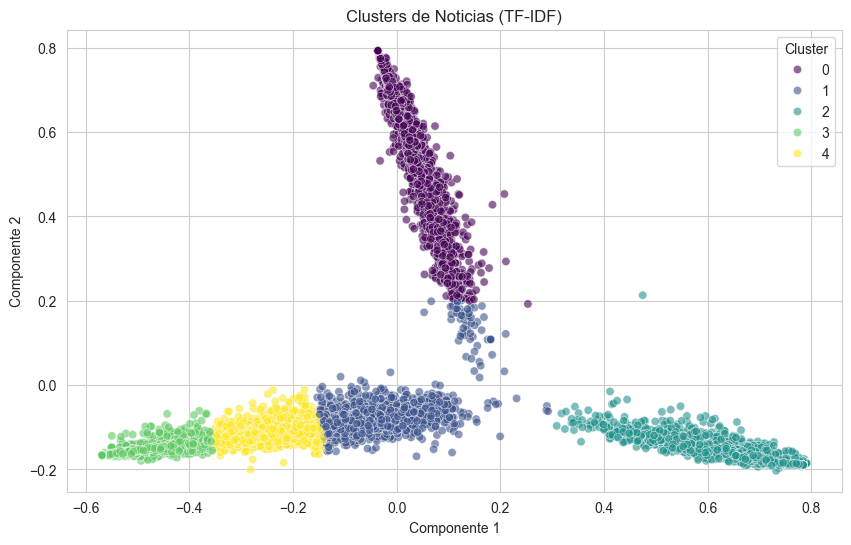

In [17]:
# modelo 2 para bigramas con tf-idf

# PCA para reducir la dimensionalidad

from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
tfidf_pca2 = pca.fit_transform(tfidf_df2)

# Crear un DataFrame con los resultados de PCA
tfidf_pca_df2 = pd.DataFrame(tfidf_pca2, columns=['Componente 1', 'Componente 2'])

# ajustar modelo kmeans con 5 clusters
from sklearn.cluster import KMeans


kmeans.fit(tfidf_pca_df2)

# Añadir las etiquetas de los clusters al DataFrame
tfidf_pca_df2['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tfidf_pca_df2, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters de Noticias (TF-IDF)')
plt.show()

In [18]:
# visualizar las palabras por cluster

# Obtener los centroides de los clusters
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=tfidf_df2.columns)

# Mostrar las palabras más importantes de cada cluster
n_palabras = 10
for i, row in cluster_centers_df.iterrows():
    print(f"\nCluster {i}:")
    print(row.nlargest(n_palabras), "\n")


Cluster 0:
caldas                   0.125041
duran coronavirus        0.124968
bipolaridad aranzazu     0.124968
mentales dan             0.124968
aranzazu caldas          0.124968
caldas enfermedades      0.124968
aranzazu                 0.124968
solidario coronavirus    0.124968
tregua duran             0.124968
dan tregua               0.124945
Name: 0, dtype: float64 


Cluster 1:
manizales       0.098634
manizales pm    0.097961
vida            0.065593
prueba          0.057356
salud           0.057067
colegio         0.056855
par             0.056520
miedo           0.056307
clases          0.056215
mente           0.055848
Name: 1, dtype: float64 


Cluster 2:
garcía            0.184473
márquez           0.151609
garcía márquez    0.151513
personas          0.085258
primer            0.080049
empresas          0.078778
alias             0.078668
meta              0.078321
libertad          0.077711
llegar            0.077194
Name: 2, dtype: float64 


Cluster 3:
manizales     

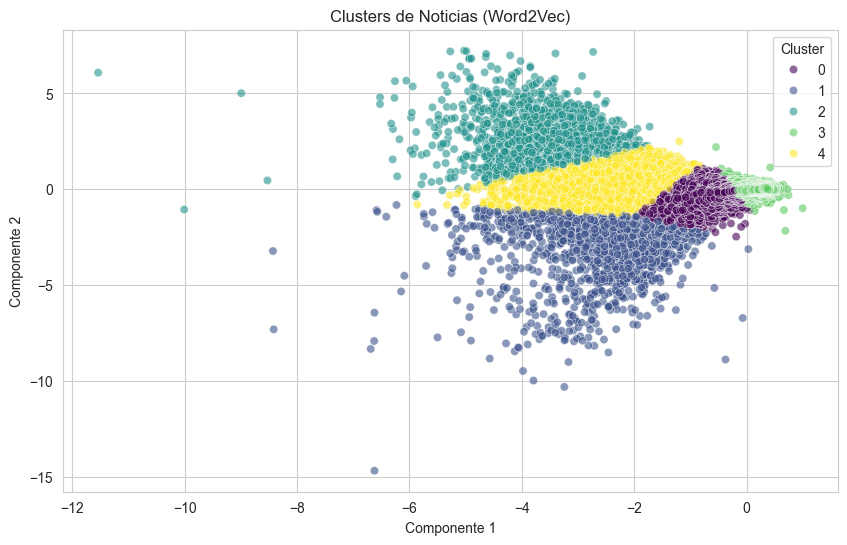

In [19]:
# modelo 3 para unigramas con word2vec

# Crear un DataFrame con los embeddings de Word2Vec
word2vec_df = pd.DataFrame(word2vec_model.wv.vectors, index=word2vec_model.wv.index_to_key)

# Reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
word2vec_pca = pca.fit_transform(word2vec_df)

# Crear un DataFrame con los resultados de PCA
word2vec_pca_df = pd.DataFrame(word2vec_pca, index=word2vec_df.index, columns=['Componente 1', 'Componente 2'])

# ajustar modelo kmeans con 5 clusters

kmeans.fit(word2vec_pca_df)

# Añadir las etiquetas de los clusters al DataFrame

word2vec_pca_df['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=word2vec_pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters de Noticias (Word2Vec)')
plt.show()

In [20]:
# visualizar las palabras más representativas por cluster

# Obtener los centroides de los clusters
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=word2vec_df.columns)

# Mostrar las palabras más importantes de cada cluster
n_palabras = 10
for i, row in cluster_centers_df.iterrows():
    print(f"\nCluster {i}:")
    print(row.nlargest(n_palabras), "\n")




Cluster 0:
94    0.246439
65    0.212746
59    0.211783
7     0.189854
93    0.172109
98    0.170001
91    0.165613
43    0.159517
75    0.154947
29    0.141953
Name: 0, dtype: float32 


Cluster 1:
94    1.048034
43    0.932579
7     0.784357
59    0.734069
67    0.689897
81    0.686443
52    0.656333
65    0.633880
57    0.623273
93    0.603318
Name: 1, dtype: float32 


Cluster 2:
35    0.925340
98    0.745134
31    0.737894
76    0.709162
96    0.692741
65    0.660375
91    0.656733
21    0.626017
99    0.567114
87    0.541279
Name: 2, dtype: float32 


Cluster 3:
91    0.047967
90    0.038548
94    0.036006
7     0.035166
74    0.034817
98    0.031485
65    0.028859
40    0.027835
67    0.027312
43    0.026398
Name: 3, dtype: float32 


Cluster 4:
65    0.447011
59    0.413090
98    0.410837
91    0.370877
94    0.368561
93    0.351390
96    0.340552
76    0.333169
21    0.324087
75    0.307511
Name: 4, dtype: float32 



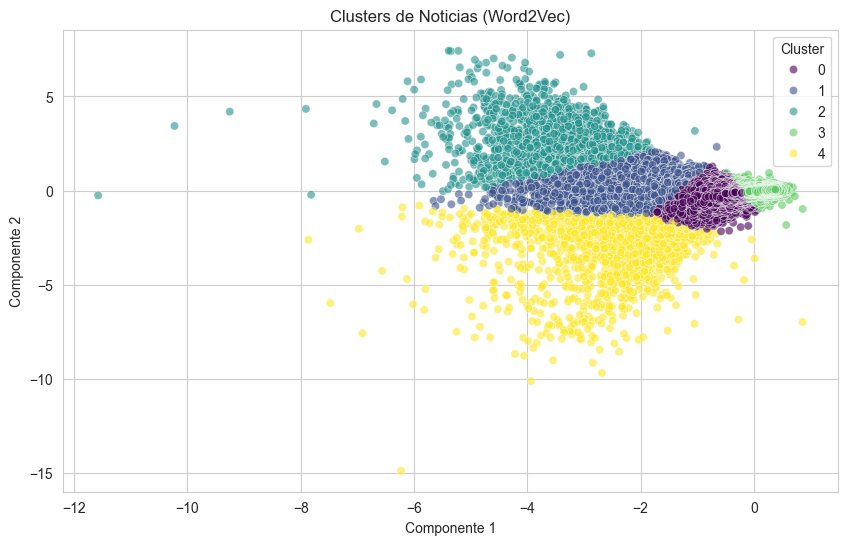

In [21]:
# modelo 4 para bigramas con word2vec

# Crear un DataFrame con los embeddings de Word2Vec



word2vec_model2 = Word2Vec(sentences=data['tokens_sin_stopwords'], 
                           vector_size=100, 
                           window=5, 
                           min_count=1, 
                           workers=4)

word2vec_df2 = pd.DataFrame(word2vec_model2.wv.vectors, index=word2vec_model2.wv.index_to_key)


# Reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
word2vec_pca2 = pca.fit_transform(word2vec_df2)

# Crear un DataFrame con los resultados de PCA
word2vec_pca_df2 = pd.DataFrame(word2vec_pca2, index=word2vec_df2.index, columns=['Componente 1', 'Componente 2'])

# ajustar modelo kmeans con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(word2vec_pca_df2)

# Añadir las etiquetas de los clusters al DataFrame

word2vec_pca_df2['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=word2vec_pca_df2, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters de Noticias (Word2Vec)')
plt.show()

In [22]:
# visualizar las palabras más representativas por cluster

# Obtener los centroides de los clusters
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=word2vec_df2.columns)

# Mostrar las palabras más importantes de cada cluster
n_palabras = 10
for i, row in cluster_centers_df.iterrows():
    print(f"\nCluster {i}:")
    print(row.nlargest(n_palabras), "\n")


Cluster 0:
94    0.242660
65    0.213423
7     0.196271
59    0.185861
43    0.160892
93    0.157112
98    0.149764
91    0.149202
29    0.148630
75    0.141013
Name: 0, dtype: float32 


Cluster 1:
65    0.414643
94    0.406714
98    0.389508
59    0.387018
93    0.366203
91    0.364240
96    0.303719
90    0.299483
76    0.297865
7     0.296278
Name: 1, dtype: float32 


Cluster 2:
35    0.865687
31    0.829821
98    0.774713
91    0.713320
96    0.638507
76    0.618257
93    0.588766
90    0.561238
87    0.552021
59    0.542566
Name: 2, dtype: float32 


Cluster 3:
91    0.043705
94    0.039773
7     0.037224
90    0.036277
74    0.035088
40    0.030884
98    0.030560
65    0.027806
86    0.026883
67    0.025856
Name: 3, dtype: float32 


Cluster 4:
94    0.955977
43    0.905887
7     0.819656
65    0.751243
81    0.651597
52    0.641689
67    0.633942
59    0.623392
29    0.612488
54    0.595909
Name: 4, dtype: float32 

